In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
from utils import (
    create_fasta_file, create_random_strand, reverse_complement,
    read_synthesized_strands_from_file, get_fastq_records, get_badread_strand_id
)
from checksum import CheckSum4
import random
from clustering import Clustering
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
strand_length = 200
n_strands = 1004

strands = [create_random_strand(strand_length) for i in range(n_strands)]

In [4]:
checksum = CheckSum4()

In [5]:
encoded_strands = checksum.encode(strands)

In [6]:
checksum.decode(candidates=encoded_strands, n_reference_strands=1004, clustered_seqs=[[]], n_guesses=15)

{'CGTTAGCTAAGAATTGAGGTATCGCAGACCCTCTCCTACACGCCTTACACTATTCTCACAGTCATACCACATAATGATGCACTCCCAAGATCCCTCTCCCACACGGAGCCCGAGAACCACAGCTTACGAGGTGTCAAAACCTCCCCGTACACGGTAGAACCGGCCCAGTAGGAAAAGCCATCAGCTGAGTCAGAGCTAATTTTT',
 'ATGAAACATAGCTGCTGCAATGAACCTTTCCGGTGAAGGTAGCCCACTGCGTTGTCCTCCCCTCATACGTTTACAAACCAGCAGTGGGACCGCCTCCATGGGACGGGCCTCGCCCATTTGTGACTCAAGTTCGCATTAATGCTACCGCGCCCGGGTCGCCCTGGGCGCTCCGAGCGTTATGGTCGCTGTTTCTATGAGTCATGC',
 'GACAACTAAAATACCTACAACGGCACAATTAAGCCGACTCAAGTAAACGGGCGTTATCTACTGACCAGATCGTGACATCGGGCACCCTGCTTAGGGAAATTGGAGCAAAAGTGCGAATTAGGACGTCTGCACTGGGTGCTTGCGCCCCGCGTCACGCTCCGTCTGGCTGTGAAATTGTATCATGTCGCTTCTAATACACAACGT',
 'GCATTACTCGGCACCGTACTCGATGGCAGTGCGGGAACCGCTCCCAGCAGCGACTGGTCTCAGGTGTACCAAGAGGGGAGATGGGCCGCTGCTATTCCTCCCGCTGGGACCCCTTGCGTTTGGCCGTATGCTACTACCAGGGCAGGATTTAAATTACCCATGTGAAATGCGTCCCCGCGACTGTGAGGTCTCTTTGTCCTATTA',
 'CGCAGATACGTATCCTGCAGTCGCACAGTCAGTGGGGGAACACTACAAATATTCCGGGAAATGGCTTTCTCAGCATGCATAAAATCGAGGAAGTCGGTTACATATAACGTCTTTCGTCCGCATGGTGACACACTTCCTTGAACGTTGGTAACAGATCCCTGA

In [7]:
half_flipped = [reverse_complement(i) if random.randint(0, 1) == 1 else i for i in encoded_strands]

In [22]:
random.randint(0 ,1)

1

In [8]:

print(len(checksum.decode(candidates=half_flipped, n_reference_strands=1004, clustered_seqs=[[]], n_guesses=15)))

1004


In [13]:
# Read cat.fasta - add encoding
# write fasta
# badread
# do clustering get candidates
# decode without apriori

In [16]:
original_strands, original_strand_ids = read_synthesized_strands_from_file(file_path=r"C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\v2\raptor_data\cat.jpg_RU10 2.fasta")

In [18]:
encoded_strands = checksum.encode(original_strands)

In [22]:
create_fasta_file(ids=original_strand_ids, strands=encoded_strands, output_filepath='cat_encoded.fasta')

File saved as cat_encoded.fasta


In [24]:
# Raptor
records = get_fastq_records(fastq_filepath=r"C:\Users\Parv\Doc\RA\Projects\clustering_dna_storage\cat_encoded_synth.fasta\cat_encoded_synth.fasta")

12259it [00:00, 24582.08it/s]


In [27]:
reads = [str(i.seq) for i in records]
ids = [get_badread_strand_id(i) for i in records]

In [59]:
clustering = Clustering(strand_pool=reads, reference_length=204, original_strands=encoded_strands, strand_pool_ids=ids, original_strand_ids=original_strand_ids, distance_threshold=20)

Filtering strands by length
0.03842075210049759 strands filtered out
Removing adapters


100%|██████████| 11788/11788 [00:00<00:00, 25111.06it/s]


Clustering strands
Total strands 11788


100%|██████████| 11788/11788 [01:17<00:00, 152.50it/s]


Number of clusters = 2332
Clusters are sorted
Orientation fixed in the strand pool
Generating 1054 candidates


100%|██████████| 1054/1054 [01:56<00:00,  9.03it/s]


Evaluating candidates


1054it [00:13, 77.21it/s]


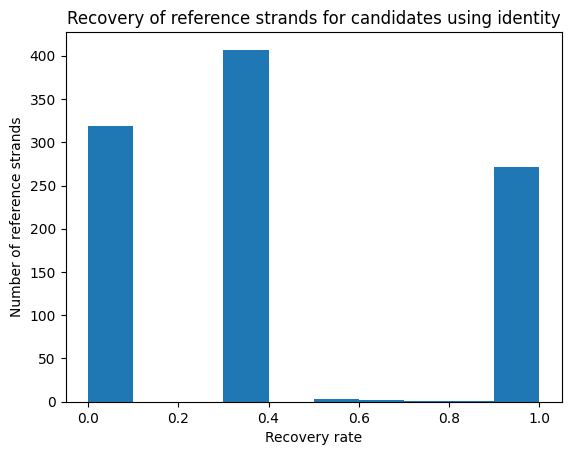

In [60]:
clustering.run_pipeline(fix_orientation=False)

In [33]:
clustering.original_strands = original_strands

In [69]:
# We want to recover the original strands after checksum
decoded_strands = checksum.decode(candidates=clustering.candidates, n_reference_strands=len(original_strands), clustered_seqs=clustering.clustered_seqs, n_guesses=5, guesses=True)

 10%|█         | 109/1054 [00:14<02:09,  7.31it/s]


KeyboardInterrupt: 

In [ ]:
len(decoded_strands)

619

In [ ]:
original_strands_rec = 0

for i in original_strands:
    if i in decoded_strands:
        original_strands_rec += 1

In [ ]:
original_strands_rec

593

In [52]:
print([len(i) for i in clustering.clustered_seqs])

[23, 22, 22, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

644it [00:00, 1777.50it/s]


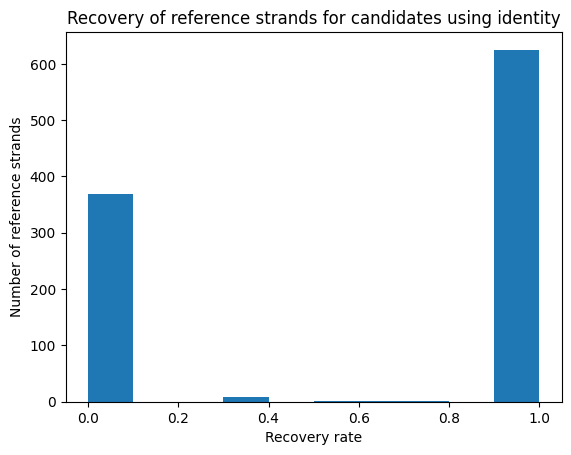

In [53]:
evaluation_dict = clustering.evaluate_candidates(candidates=decoded_strands, hist=True)

In [58]:
evaluation_dict['reference_recoveries']

array([0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
       1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   , 0.   ,
       0.   , 0.   , 1.   , 1.   , 0.   , 0.78 , 1.   , 1.   , 0.   ,
       1.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 1.   ,
       0.   , 0.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.   , 0.34 , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.   , 0.   , 1.   , 1.   , 0.   , 0.   , 0.   , 1.   , 1.   ,
       1.   , 0.   , 1.   , 1.   , 0.   , 0.   , 0.   , 1.   , 1.   ,
       1.   , 0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
       1.   , 0.   , 1.   , 0.   , 0.   , 0.   , 1.   , 1.   , 1.   ,
       0.   , 0.   , 0.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   ,
       0.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   , 0.   ,
       0.   , 1.   ,